In [1]:
using DataStructures
using StatsPlots
using DataFrames
PW_PATH = "/home/tom/MSC_Rostock/Network_Security/Password_Files/Orig/"
PW_SC_DB_PATH = "/home/tom/MSC_Rostock/Network_Security/Password_Files/PW_with_sc_list"

"/home/tom/MSC_Rostock/Network_Security/Password_Files/PW_with_sc_list"

In [2]:
special_char_regex = r"[^A-Za-z0-9]"
special_char_matcher(s::AbstractString) = match(special_char_regex, s) != nothing

special_char_matcher (generic function with 1 method)

## Loop through password databases and get those with special characters

In [3]:
pw_ct = 0
pw_ct_sc = 0
io = open(PW_SC_DB_PATH, "w")
for pw_db_path in readdir(PW_PATH, join=true)
    println(pw_db_path)
    ct = 0
    ct_sc = 0
    for pw in eachline(pw_db_path)
        try
            s = ascii(pw) # some lines are dirty - outliers
            if 0 < length(s) <= 30 # some lines are very long - outliers
                ct += 1
                if special_char_matcher(s)
                    ct_sc += 1
                    println(io, s)
                end
            end
            catch e
        end
    end
    println("\t $ct valid passwords $ct_sc with special")
    pw_ct += ct
    pw_ct_sc += ct_sc
end
close(io)
"Found $pw_ct valid passwords and $pw_ct_sc pws with special characters"

/home/tom/MSC_Rostock/Network_Security/Password_Files/Orig/000webhost.txt
	 719801 valid passwords 49332 with special
/home/tom/MSC_Rostock/Network_Security/Password_Files/Orig/alleged-gmail-passwords.txt
	 3129241 valid passwords 86176 with special
/home/tom/MSC_Rostock/Network_Security/Password_Files/Orig/darkc0de.txt
	 1470867 valid passwords 204860 with special
/home/tom/MSC_Rostock/Network_Security/Password_Files/Orig/fortinet-2021.txt
	 369567 valid passwords 369563 with special
/home/tom/MSC_Rostock/Network_Security/Password_Files/Orig/hotmail.txt
	 8930 valid passwords 623 with special
/home/tom/MSC_Rostock/Network_Security/Password_Files/Orig/izmy.txt
	 1365 valid passwords 601 with special
/home/tom/MSC_Rostock/Network_Security/Password_Files/Orig/md5decryptor-uk.txt
	 3396773 valid passwords 117290 with special
/home/tom/MSC_Rostock/Network_Security/Password_Files/Orig/myspace.txt
	 37079 valid passwords 3941 with special
/home/tom/MSC_Rostock/Network_Security/Password_Files

"Found 32425115 valid passwords and 2358802 pws with special characters"

## Count positions per special character

In [4]:
special_char_positions(s::AbstractString) = ((first(m.match), m.offset) for m in eachmatch(special_char_regex, s))
sc_p_counter = Dict{Char, Accumulator{Int, Int}}()

Dict{Char, Accumulator{Int64, Int64}}()

In [5]:
for pw in eachline(PW_SC_DB_PATH)
    for (c, p) in special_char_positions(pw)
        p_counter = get!(sc_p_counter, c, counter(Int))
        inc!(p_counter, p)
    end
end
join(keys(sc_p_counter), " ")

"] < ; ^ \x17 @ \x7f ? ( , \a \\ \x0f \x11 ~ # \x01 \e + \t \x03 \x19 } [ ` ' \b : \x02 \" \x05 * / \x1c = \$ - . _ \x06 \x04 { ! & ) >   \x1a | %"

## Calculate statistics and show histogram

In [6]:
sc_ct_total = Dict(c => sum(sc_p_counter[c]) for c in keys(sc_p_counter))
sc_ct_df = DataFrame(:Character => collect(keys(sc_ct_total)), :Total => collect(values(sc_ct_total)))
sort!(sc_ct_df, :Total, rev=true)
pos_max = maximum(maximum(keys(d)) for d in values(sc_p_counter))
pos_ct_total = [sum(get(d,i,0) for d in values(sc_p_counter)) for i in 1:pos_max]
pos_ct_df = DataFrame(:Position => collect(1:pos_max), :Total => pos_ct_total)
sort!(pos_ct_df, :Total, rev=true);

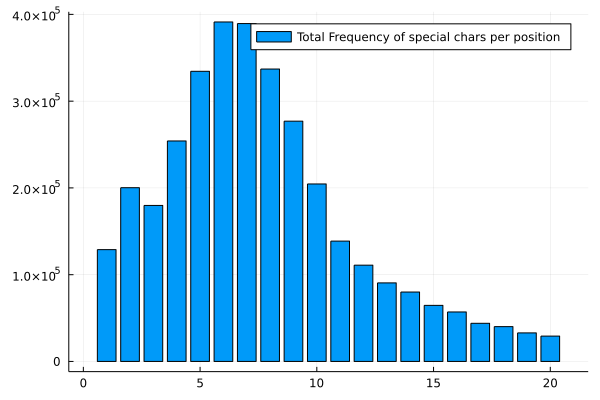

In [7]:
cols = [:Position, :Total]
@df pos_ct_df[1:20,cols] bar(:Position, :Total, label="Total Frequency of special chars per position")

In [8]:
# Total counts over all positions:
most_frequent_sc = sc_ct_df[1:4,:Character]
for (i,c) in enumerate(sc_ct_df[1:20,:Character])
    println(i, " : ", c)
end

1 : .
2 :  
3 : -
4 : :
5 : _
6 : @
7 : !
8 : *
9 : '
10 : /
11 : #
12 : $
13 : &
14 : "
15 : \
16 : +
17 : ,
18 : `
19 : ?
20 : %


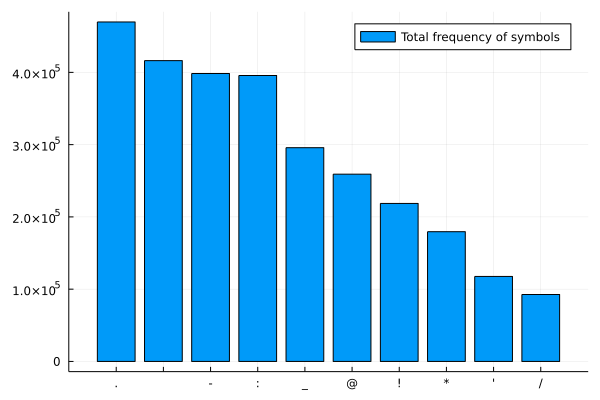

In [9]:
cols = [:Character, :Total]
@df sc_ct_df[1:10,cols] bar(:Character, :Total, label="Total frequency of symbols")

In [10]:
# most frequent special char per position
pos_max_ct = [maximum(get(d,i,0) for d in values(sc_p_counter)) for i in 1:pos_max]
pos_max_sc = [[k for k in keys(sc_p_counter) if sc_p_counter[k][i] === pos_max_ct[i]] for i in 1:length(pos_max_ct)]
for (l,m,i) in zip(pos_max_sc, pos_max_ct, 1:length(pos_max_sc))
    println("Pos $i - $(l[1]) - $m")
end

Pos 1 - * - 25795
Pos 2 -   - 51240
Pos 3 - - - 28274
Pos 4 - - - 60799
Pos 5 - - - 73925
Pos 6 - - - 65466
Pos 7 - . - 54659
Pos 8 - : - 51229
Pos 9 - : - 52623
Pos 10 - : - 34997
Pos 11 - : - 30115
Pos 12 - : - 23179
Pos 13 - : - 21309
Pos 14 - : - 18609
Pos 15 - : - 14801
Pos 16 - : - 11222
Pos 17 - . - 8934
Pos 18 - . - 7703
Pos 19 - . - 6112
Pos 20 - @ - 4703
Pos 21 - @ - 3985
Pos 22 - @ - 3034
Pos 23 - @ - 2545
Pos 24 - @ - 2024
Pos 25 - @ - 1338
Pos 26 - ! - 1265
Pos 27 - ! - 1053
Pos 28 - ! - 667
Pos 29 - ! - 439
Pos 30 - ! - 355


In [11]:
# remove the most frequent and watch again
for c in most_frequent_sc
    delete!(sc_p_counter, c)
end
pos_max_ct = [maximum(get(d,i,0) for d in values(sc_p_counter)) for i in 1:pos_max]
pos_max_sc = [[k for k in keys(sc_p_counter) if sc_p_counter[k][i] === pos_max_ct[i]] for i in 1:length(pos_max_ct)]
for (l,m,i) in zip(pos_max_sc, pos_max_ct, 1:length(pos_max_sc))
    println("Pos $i - $(l[1]) - $m")
end

Pos 1 - * - 25795
Pos 2 - @ - 16472
Pos 3 - ' - 22060
Pos 4 - _ - 32552
Pos 5 - _ - 44726
Pos 6 - _ - 46750
Pos 7 - _ - 41211
Pos 8 - ! - 30018
Pos 9 - ! - 28178
Pos 10 - ! - 22911
Pos 11 - @ - 12170
Pos 12 - @ - 12001
Pos 13 - @ - 10494
Pos 14 - @ - 11277
Pos 15 - @ - 8657
Pos 16 - @ - 7953
Pos 17 - @ - 6121
Pos 18 - @ - 6083
Pos 19 - @ - 5515
Pos 20 - @ - 4703
Pos 21 - @ - 3985
Pos 22 - @ - 3034
Pos 23 - @ - 2545
Pos 24 - @ - 2024
Pos 25 - @ - 1338
Pos 26 - ! - 1265
Pos 27 - ! - 1053
Pos 28 - ! - 667
Pos 29 - ! - 439
Pos 30 - ! - 355
